In [1]:
import pandas as pd

# Introduction

In this lab we want you to learn and investigate some concepts in the context of Pandas: **concatenating**, **joining**, and **merging**. We want to review these concepts because it will make the subsequent work in transforming the datasets a lot more efficient.

# Concatenating, Joining, & Merging Tutorial


## Concatenating

Concatenating two dataframes combines two dataframes so that we append the rows of one dataframe at the end of the other. Our column names have to be identical for this function to work properly.

Below is an example of the `concat()` function in pandas

https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [2]:
df1 = pd.DataFrame({'A': ['a'+str(x) for x in range(3)],
                    'B': ['b'+str(x) for x in range(3)],
                    'C': ['c'+str(x) for x in range(3)]},
                     index=[0, 1, 2])

df2 = pd.DataFrame({'A': ['a'+str(x) for x in range(3, 6)],
                    'B': ['b'+str(x) for x in range(3, 6)],
                    'C': ['c'+str(x) for x in range(3, 6)]},
                     index=[3, 4, 5]) 

df3 = pd.DataFrame({'D': ['d'+str(x) for x in range(3)],
                    'E': ['e'+str(x) for x in range(3)],
                    'F': ['f'+str(x) for x in range(3)]},
                     index=[0, 1, 2]) 

df4 = pd.DataFrame({'D': ['d'+str(x) for x in range(3, 6)],
                    'E': ['e'+str(x) for x in range(3, 6)],
                    'F': ['f'+str(x) for x in range(3, 6)]},
                     index=[3, 4, 5]) 

# print(df1, '\n---\n', df2, '\n---\n', df3, '\n---\n',df4)

Let's try concatenating `df1` and `df2`, as well as `df3` and `df4`. 

In [21]:
df12 =pd.concat([df1, df2])
df12.head(15)

df34= pd.concat([df3,df4])

From the output above, you see the second dataframe is appended at the bottom of the first dataframe.

Now let's try concatenating `df1`, `df2`, `df3`, and `df4` all together.

Note that the `sort=False` param is supplied to silence a warning message on a future Pandas change. It does not make any difference on the output.

In [8]:
df1234 =pd.concat([df1, df2,df3,df4])
print(df1234)

     A    B    C    D    E    F
0   a0   b0   c0  NaN  NaN  NaN
1   a1   b1   c1  NaN  NaN  NaN
2   a2   b2   c2  NaN  NaN  NaN
3   a3   b3   c3  NaN  NaN  NaN
4   a4   b4   c4  NaN  NaN  NaN
5   a5   b5   c5  NaN  NaN  NaN
0  NaN  NaN  NaN   d0   e0   f0
1  NaN  NaN  NaN   d1   e1   f1
2  NaN  NaN  NaN   d2   e2   f2
3  NaN  NaN  NaN   d3   e3   f3
4  NaN  NaN  NaN   d4   e4   f4
5  NaN  NaN  NaN   d5   e5   f5


What do we find?

* Pandas' `concat` method respects indexes of all axes. 
    * Because `df3` and `df4` have different column indexes than `df1` and `df2`, `concat` put them into different columns. 
    * `df3` and `df4` also retain their original row indexes of 0-5 instead of continuing from the last index of `df2`. 
* `concat` creates `NaN` at places where values are missing.

Try also supplying `ignore_index=True` to `concat`. How is the output different?

In [10]:
df1234 =pd.concat([df1, df2,df3,df4], ignore_index=True)
print(df1234)

      A    B    C    D    E    F
0    a0   b0   c0  NaN  NaN  NaN
1    a1   b1   c1  NaN  NaN  NaN
2    a2   b2   c2  NaN  NaN  NaN
3    a3   b3   c3  NaN  NaN  NaN
4    a4   b4   c4  NaN  NaN  NaN
5    a5   b5   c5  NaN  NaN  NaN
6   NaN  NaN  NaN   d0   e0   f0
7   NaN  NaN  NaN   d1   e1   f1
8   NaN  NaN  NaN   d2   e2   f2
9   NaN  NaN  NaN   d3   e3   f3
10  NaN  NaN  NaN   d4   e4   f4
11  NaN  NaN  NaN   d5   e5   f5


In this case we get an index of 11 rather than a repeating the index of df3 and df4.

## Merging and Joining

Pandas has two functions for joining datasets: `merge()` and `join()`. They perform the same task but have different options and syntax. 

Below is an example of `merge` and `join`.     
HINT (uses the column that repeats in both dataframes )

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [11]:
left = pd.DataFrame({'idx': ['i'+str(x) for x in range(3)],
                     'A': ['a'+str(x) for x in range(3)],
                     'B': ['b'+str(x) for x in range(3)]})


right = pd.DataFrame({'idx': ['i'+str(x) for x in range(1,4)],
                     'C': ['c'+str(x) for x in range(1,4)],
                     'D': ['d'+str(x) for x in range(1,4)]})

In [12]:
left

,idx,A,B
0,i0,a0,b0
1,i1,a1,b1
2,i2,a2,b2


In [13]:
right

,idx,C,D
0,i1,c1,d1
1,i2,c2,d2
2,i3,c3,d3


`join` is identical to `merge`. But when using join, we need to explicitly set the index column of the dataframes to join using `set_index`:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

In [18]:
#left.join(right)

res1 = left.join(right.set_index('idx'), on='idx')


,idx,A,B,C,D
0,i0,a0,b0,NaN,NaN
1,i1,a1,b1,c1,d1
2,i2,a2,b2,c2,d2


And you see, `join` disregards the row of `right` with the unmatching index `i3`. It retains the row of `left` with the unmatching index `i0` but uses `NaN` for the missing data after joining.

#### There are other options we can explore with the `merge()` and `join()` functions. 

Specifically, we can specify `how`. This argument in the function tells us whether we are performing an inner, left, right, or outer join.

We can also specify a different column for joining in the `merge()` function using the `left_on` and `right_on` arguments. Check out the following documentations if you want to explore more:

[pandas.DataFrame.merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html)

[pandas.DataFrame.join](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html)

## Bonus Question

Now if you look back on `merge` and `join`, you realize that in order to perform these functions on a set of dataframes, these dataframes must share a common column as the index. Only rows that have the same index values will be joined. This is similar to the [`join` function in MySQL](https://www.w3schools.com/sql/sql_join.asp), isn't it?

The bonus question for you is to figure out how to join and concatenate `df1`, `df2`, `df3`, and `df4` we created at the beginning of this challenge. Your end product should look like this:

![df1-2-3-4.png](../images/df1-2-3-4.png)

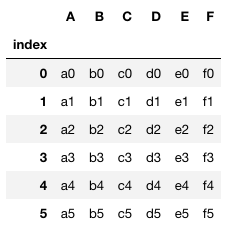

In [24]:
#join df1 and df2 along their index
#join df3 and df4 along their index
#concat the results along axis 1

# Join df1 and df2
#merged1 = df1.join(df2)

# Join df3 and df4 
#merged2 = df3.join(df4)

# Concat axis 1
#result = pd.concat([merged1, merged2], axis=1)

# Why is it not working?


#Method 2

#concat df1 df2
#cocat df3 and df4
# do a left join on them


df12 =pd.concat([df1, df2])

df34= pd.concat([df3,df4])

merged1 = df12.join(df34)

print(merged1)

#print(result)

    A   B   C   D   E   F
0  a0  b0  c0  d0  e0  f0
1  a1  b1  c1  d1  e1  f1
2  a2  b2  c2  d2  e2  f2
3  a3  b3  c3  d3  e3  f3
4  a4  b4  c4  d4  e4  f4
5  a5  b5  c5  d5  e5  f5
